## Linear Regression with one variable

In this first example, we are tasked with implementing linear regression to predict profits for a food truck. The assignment and results are based off of Machine learning class by Andrew Ng, and a wonderful explanation from this Towards Datascience post.

https://towardsdatascience.com/gradient-descent-simply-explained-1d2baa65c757


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
import os 
path = os.getcwd() + '\ex1_data\ex1data1.txt'
mydata = pd.read_csv(path, header=None, names=['Population', 'Profit'])
mydata.head()

,Population,Profit
0,6.1101,17.5920
1,5.5277,9.1302
2,8.5186,13.6620
3,7.0032,11.8540
4,5.8598,6.8233


The initial numbers show that there might be some correlation between population and profit, but let's see if there is an actual correation using. 

First we will use the describe() function from pandas to get an idea of the distribution. 

In [3]:
mydata.describe()

,Population,Profit
count,97.000000,97.000000
mean,8.159800,5.839135
std,3.869884,5.510262
min,5.026900,-2.680700
25%,5.707700,1.986900
50%,6.589400,4.562300
75%,8.578100,7.046700
max,22.203000,24.147000


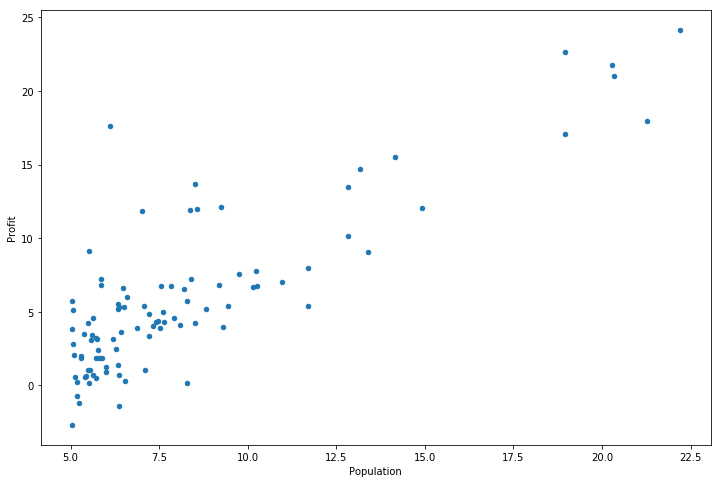

In [4]:
mydata.plot(kind='scatter', x="Population", y='Profit', figsize=(12,8))

First we will make a scater plot between them to see if there is a linear relationship between population and profit. Using our eyes, we can first see that there is a cluster that is somewhat linear in the bottom corner, which seems to become more clear in the higher population and profit values on the top right. But we can do better than that :) Let's see what we can gain from applying gradient descent and linear regression. 


### Gradient Descent

In this part, we are going to fit the linear regression parameters to the following cost function. \begin{equation*} \frac{1}{2m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}
\end{equation*}

Where the hypothesis is given by the linear model

\begin{equation*} 
h_{\theta}(x) = \theta^{T}x = \theta_{0} + \theta_{1}x_{1}
\end{equation*}

So we first have the const function which is the squared difference between the prediction and actual y-value, divided by twice the of data points. 

Let's first talk about the MSE or most of the cost function before the 1/2 that we multiply at the end 

 \begin{equation*} \frac{1}{m}\sum_{i=1}^{m}(h_{\theta}(x^{(i)})-y^{(i)})^{2}\end{equation*}
 
 So this is actually the equation for Mean Squared Error (https://en.wikipedia.org/wiki/Mean_squared_error), which has a number of advantages as a cost function, or an estimator of how well the function is doing. 
 
 
 ### why do we square the error?
 First the values are always non-negative, and the values that are closer to 0 are better. We also penalize "incorrect" errors a great deal by squaring this. This can make it a lot easier to get to the optimal answer, but also makes larger errors have a great effect on the score of the model.  Other alternatives can be the mean absolute error or cost functions based on the median. 
 
 Another great explanation (a much deeper one than here) can be found at the following post. 
 https://www.benkuhn.net/squared
 
 ### why do we divide by number of variables?
Of course the mean of our squared error is also the same thing as the expectation of our squared error or one final "score" for the current iteration of our model.
 

In [5]:
def computeCost(X, y, theta):
    inner = np.power(((X * theta.T) - y), 2)
    return np.sum(inner) / (2 * len(X))

Let's add a column of ones to the training set so we can use a vectorized solution to computing the cost and gradients.


In [6]:
mydata.insert(0, 'Ones', 1) # this is because the coefficients for X0 are 1
mydata.head()

,Ones,Population,Profit
0,1,6.1101,17.5920
1,1,5.5277,9.1302
2,1,8.5186,13.6620
3,1,7.0032,11.8540
4,1,5.8598,6.8233


In [7]:
# set X (training data)
# and y (target variable)
cols = mydata.shape[1] # columns
X = mydata.iloc[:,0:cols-1]  #everything up until profits
y = mydata.iloc[:,cols-1:cols] # just profits

In [8]:
X.head()

,Ones,Population
0,1,6.1101
1,1,5.5277
2,1,8.5186
3,1,7.0032
4,1,5.8598


In [9]:
y.head()

,Profit
0,17.5920
1,9.1302
2,13.6620
3,11.8540
4,6.8233


In [10]:
# changing everything to matrices
X = np.matrix(X)
y = np.matrix(y)
theta = np.matrix(np.array([0,0]))

In [11]:
iterations = 1500 # number of iterations
alpha = 0.01 # learning rate

Number of iterations and our learning rate are things that can be adjusted later. A learning rate that is too small leads to painfully slow convergence, while a learning rate that is too large can hinder convergence and cause the loss function to fluctuate around the minimum or even to diverge.


In [12]:
cost = computeCost(X,y,theta)
cost

32.072733877455676

This is our initial cost function with default weights (1's for everything). Is it good? Is it bad? Let's see how far we can get withour gradient descnet. 

Next, you will implement gradient descent

In [13]:
def gradientDescent(X, y, theta, alpha, iters):  
    # temp variable
    temp = np.matrix(np.zeros(theta.shape))
    # length of thetas in the regression
    parameters = int(theta.ravel().shape[1])
    # initialize the cost to zero
    cost = np.zeros(iters)

    for i in range(iters):
        error = (X * theta.T) - y
        for j in range(parameters):
            term = np.multiply(error, X[:,j])
            temp[0,j] = theta[0,j] - ((alpha / len(X)) * np.sum(term))
        theta = temp
        cost[i] = computeCost(X, y, theta)
    return theta, cost

In [16]:
alpha = 0.01
iters = 1000
g, cost = gradientDescent(X, y, theta, alpha, iters)


In [21]:
alpha = 0.1
iters = 10
g_too_much, cost_too_much = gradientDescent(X, y, theta, alpha, iters)


In [32]:
computeCost(X, y, g)


4.515955503078914

The eventual cost that we reached was 4.5 :) much better. 

Text(0.5, 1.0, 'Predicted Profit vs. Population Size')

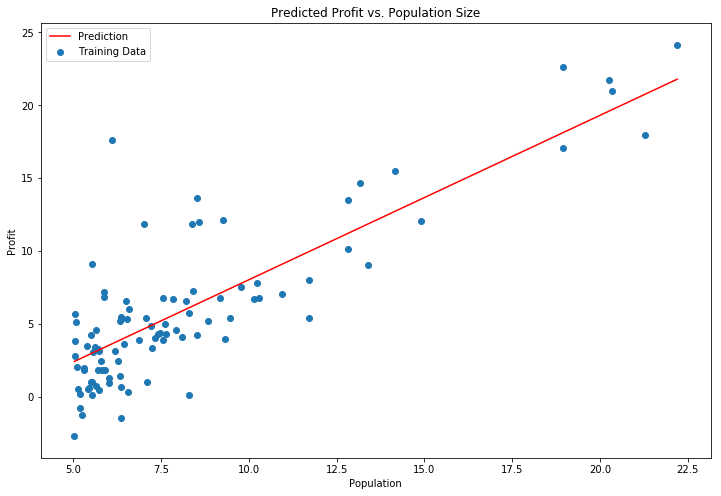

In [24]:
x = np.linspace(mydata.Population.min(), mydata.Population.max(), 100)
f = g[0, 0] + (g[0, 1] * x)

fig, ax = plt.subplots(figsize=(12,8))
ax.plot(x, f, 'r', label='Prediction')
ax.scatter(mydata.Population, mydata.Profit, label='Training Data')
ax.legend(loc=2)
ax.set_xlabel('Population')
ax.set_ylabel('Profit')
ax.set_title('Predicted Profit vs. Population Size')

Text(0.5, 1.0, 'Error vs. Training Epoch')

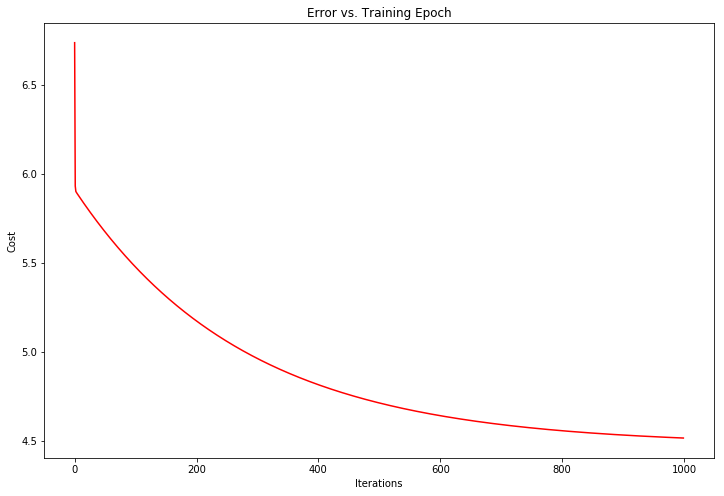

In [20]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

Text(0.5, 1.0, 'Error vs. Training Epoch')

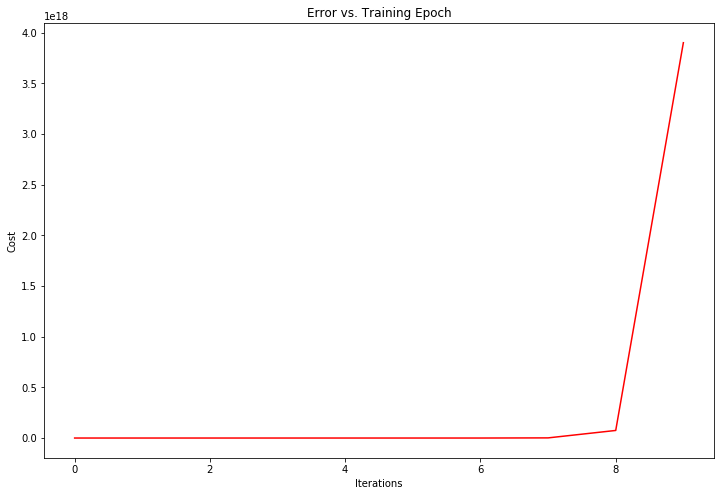

In [23]:
# this is what woudl happen if we set the number of iterations too low and the alpha too high
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost_too_much, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')

In [35]:
# what is our actual model?
# g is the variable that we store our Theda values
g

matrix([[-3.24140214,  1.1272942 ]])

And so this is how we would re-write our final linear model. 


\begin{equation*} 
y = -3.24140214 + 1.1272x_{1}
\end{equation*}



## Multiple Variables

Now the task is to expand the linear regression functions to handle more variables. We now are using 2 variables (size of house in sqft and the number of bedrooms) and target variable (price of house).

In [18]:
path = os.getcwd() + '\ex1_data\ex1data2.txt'
mydata2 = pd.read_csv(path, header=None, names=['Size', 'Bedrooms', 'Price'])
mydata2.head()

,Size,Bedrooms,Price
0,2104,3,399900
1,1600,3,329900
2,2400,3,369000
3,1416,2,232000
4,3000,4,539900


The numbers are all wonderful, but we want to make sure they are in a similar scale. 

In [19]:
mydata2 = (mydata2 - mydata2.mean()) / mydata2.std()
mydata2.head()

,Size,Bedrooms,Price
0,0.130010,-0.223675,0.475747
1,-0.504190,-0.223675,-0.084074
2,0.502476,-0.223675,0.228626
3,-0.735723,-1.537767,-0.867025
4,1.257476,1.090417,1.595389


In [20]:
# going through the same preprocessing steps
# add ones column
mydata2.insert(0, 'Ones', 1)

# set X (training data) and y (target variable)
cols = mydata2.shape[1]
X2 = mydata2.iloc[:,0:cols-1]
y2 = mydata2.iloc[:,cols-1:cols]

# convert to matrices and initialize theta
X2 = np.matrix(X2.values)
y2 = np.matrix(y2.values)
theta2 = np.matrix(np.array([0,0,0]))

# perform linear regression on the data set
g2, cost2 = gradientDescent(X2, y2, theta2, alpha, iters)

# get the cost (error) of the model
computeCost(X2, y2, g2)

0.13070336960771892

Text(0.5,1,'Error vs. Training Epoch')

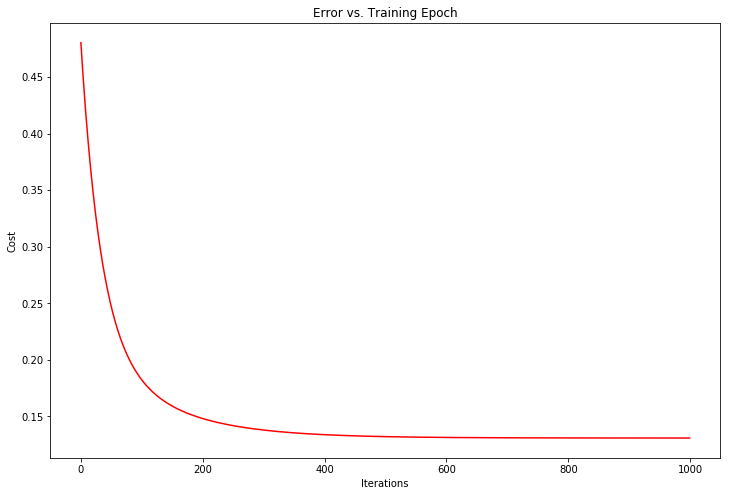

In [21]:
fig, ax = plt.subplots(figsize=(12,8))
ax.plot(np.arange(iters), cost2, 'r')
ax.set_xlabel('Iterations')
ax.set_ylabel('Cost')
ax.set_title('Error vs. Training Epoch')